     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0 

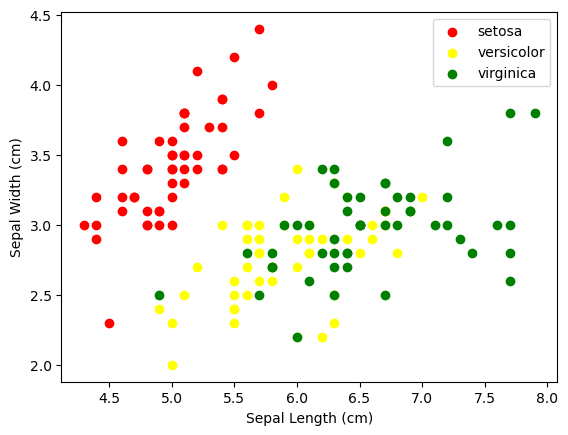

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Map numeric target to species names
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
print(df)
# Define colors
colors = ['red', 'yellow', 'green']
species = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Scatter plot: Sepal Length vs Sepal Width
for i, sp in enumerate(species):
    x = df[df['species'] == sp]
    plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'],c=colors[i], label=sp)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split  

# Features → only the 4 measurement columns
X = df[iris.feature_names]  

# Labels → species target
Y = df['target']

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

# print(x_test.head())   # shows first 5 rows of features in test set
# print(y_test.head())   # shows first 5 labels in test set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Build model
model = LogisticRegression(max_iter=200)  # increased iterations for convergence
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777


In [6]:
import pandas as pd

my_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)
my_pred = model.predict(my_data)

print("Predicted Species:", iris.target_names[my_pred[0]])


Predicted Species: setosa
